In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

pd.options.display.float_format = '{:,.2f}'.format


col_names = ['square_id', 'province', 'time_interval',
             'square_to_prov', 'prov_to_square']
mi_prov_file = pd.read_csv('all/milano/mi-to-provinces-2013-11-01.txt',
                           sep='\t', header=None, names=col_names)
mi_prov_file.head()

square_id     province  time_interval  square_to_prov  prov_to_square
0          1    AGRIGENTO  1383321600000            0.05             nan
1          1    AGRIGENTO  1383322200000            0.03             nan
2          1  ALESSANDRIA  1383291000000             nan            0.00
3          1  ALESSANDRIA  1383306000000             nan            0.00
4          1  ALESSANDRIA  1383320400000            0.00             nan

In [2]:
mi_prov_file['datetime'] = pd.to_datetime(mi_prov_file['time_interval'], unit='ms')
mi_prov_file.head()

square_id     province  time_interval  square_to_prov  prov_to_square  \
0          1    AGRIGENTO  1383321600000            0.05             nan   
1          1    AGRIGENTO  1383322200000            0.03             nan   
2          1  ALESSANDRIA  1383291000000             nan            0.00   
3          1  ALESSANDRIA  1383306000000             nan            0.00   
4          1  ALESSANDRIA  1383320400000            0.00             nan   

             datetime  
0 2013-11-01 16:00:00  
1 2013-11-01 16:10:00  
2 2013-11-01 07:30:00  
3 2013-11-01 11:40:00  
4 2013-11-01 15:40:00

In [3]:
mi_prov_file.fillna(0, inplace=True)

mi_prov_file['total_bidirection'] = (mi_prov_file['square_to_prov']
                                    + mi_prov_file['prov_to_square'])
mi_prov_file['net_outgoing'] = (mi_prov_file['square_to_prov']
                               - mi_prov_file['prov_to_square'])

mi_prov_file.head()

square_id     province  time_interval  square_to_prov  prov_to_square  \
0          1    AGRIGENTO  1383321600000            0.05            0.00   
1          1    AGRIGENTO  1383322200000            0.03            0.00   
2          1  ALESSANDRIA  1383291000000            0.00            0.00   
3          1  ALESSANDRIA  1383306000000            0.00            0.00   
4          1  ALESSANDRIA  1383320400000            0.00            0.00   

             datetime  total_bidirection  net_outgoing  
0 2013-11-01 16:00:00               0.05          0.05  
1 2013-11-01 16:10:00               0.03          0.03  
2 2013-11-01 07:30:00               0.00         -0.00  
3 2013-11-01 11:40:00               0.00         -0.00  
4 2013-11-01 15:40:00               0.00          0.00

In [4]:
mi_prov_act = mi_prov_file.groupby('square_id').sum()

mi_prov_act.head()

time_interval  square_to_prov  prov_to_square  total_bidirection  \
square_id                                                                       
1          557475038400000           16.14           15.48              31.62   
2          557475038400000           16.37           15.76              32.13   
3          463410166200000           16.62           16.06              32.68   
4          557475038400000           15.46           14.67              30.13   
5          575458143600000           14.56           13.78              28.34   

           net_outgoing  
square_id                
1                  0.66  
2                  0.62  
3                  0.57  
4                  0.80  
5                  0.79

In [5]:
mi_prov_act['net_outgoing_%'] = (mi_prov_act['net_outgoing'] 
                                 / mi_prov_act['total_bidirection'] * 100)

mi_prov_act.describe()

time_interval  square_to_prov  prov_to_square  \
count                10,000.00       10,000.00       10,000.00   
mean    544,633,834,892,699.62           91.00           91.39   
std     229,404,876,124,883.12          128.40          127.78   
min      45,649,269,000,000.00            0.00            0.40   
25%     380,410,839,300,000.00           17.27           17.83   
50%     509,059,375,200,000.00           45.77           47.06   
75%     673,673,167,050,000.00          105.59          107.15   
max   2,719,587,861,600,000.00        2,130.07        2,306.89   

       total_bidirection  net_outgoing  net_outgoing_%  
count          10,000.00     10,000.00       10,000.00  
mean              182.38         -0.39           -0.88  
std               254.98         24.86           11.16  
min                 0.86       -447.37         -100.00  
25%                35.41         -2.03           -3.06  
50%                92.36          0.54            1.00  
75%               212.27          3.93            4.70  
max             4,376.41        466.03           48.60

In [6]:
col = [(id_ % 100) if (id_ % 100) !=0 else 100 for id_ in range(1, 10001)]
row = [((id_ - col_) / 100 + 1) for id_, col_ in zip(range(1, 10001), col)]

squares_loc = pd.DataFrame()
squares_loc['square_id'] = list(range(1, 10001))
squares_loc['col'] = col
squares_loc['row'] = row

mi_prov_act = mi_prov_act.merge(squares_loc, on='square_id')
display (mi_prov_act.head())

square_id    time_interval  square_to_prov  prov_to_square  \
0          1  557475038400000           16.14           15.48   
1          2  557475038400000           16.37           15.76   
2          3  463410166200000           16.62           16.06   
3          4  557475038400000           15.46           14.67   
4          5  575458143600000           14.56           13.78   

   total_bidirection  net_outgoing  net_outgoing_%  col  row  
0              31.62          0.66            2.10    1 1.00  
1              32.13          0.62            1.92    2 1.00  
2              32.68          0.57            1.73    3 1.00  
3              30.13          0.80            2.65    4 1.00  
4              28.34          0.79            2.77    5 1.00

In [7]:
col = mi_prov_act.columns.drop(['square_id', 'time_interval', 'col', 'row'])

print (col)

Index(['square_to_prov', 'prov_to_square', 'total_bidirection', 'net_outgoing',
       'net_outgoing_%'],
      dtype='object')


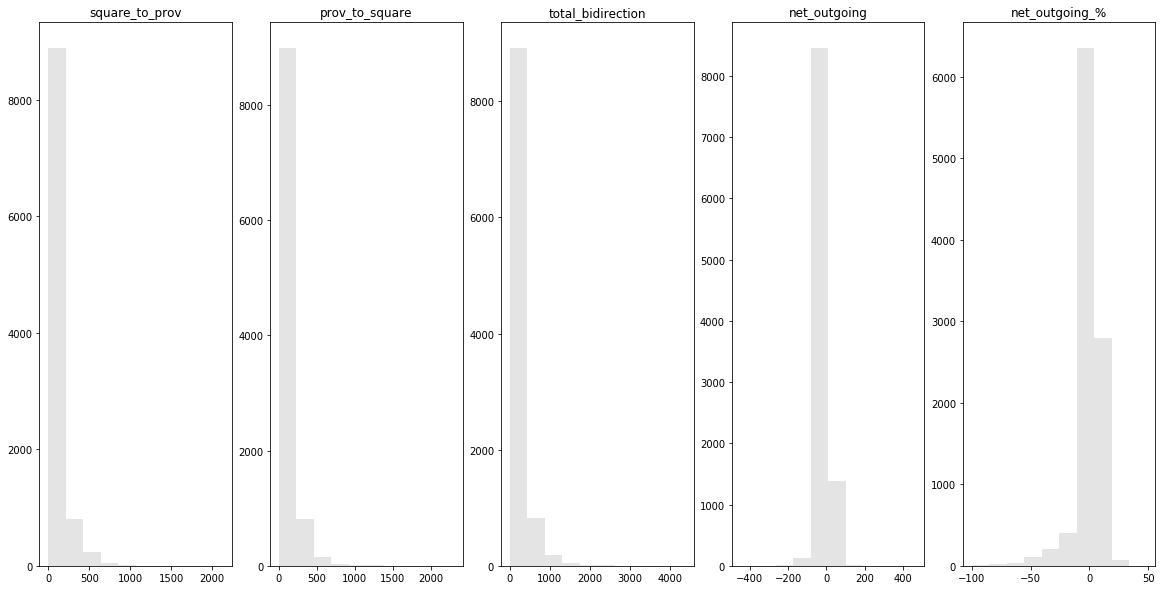

In [8]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 10))

for i, c in enumerate(col):
    ax[i].hist(mi_prov_act[c], facecolor='lightgrey', alpha=0.6)
    ax[i].set_title(c)
        
plt.show()

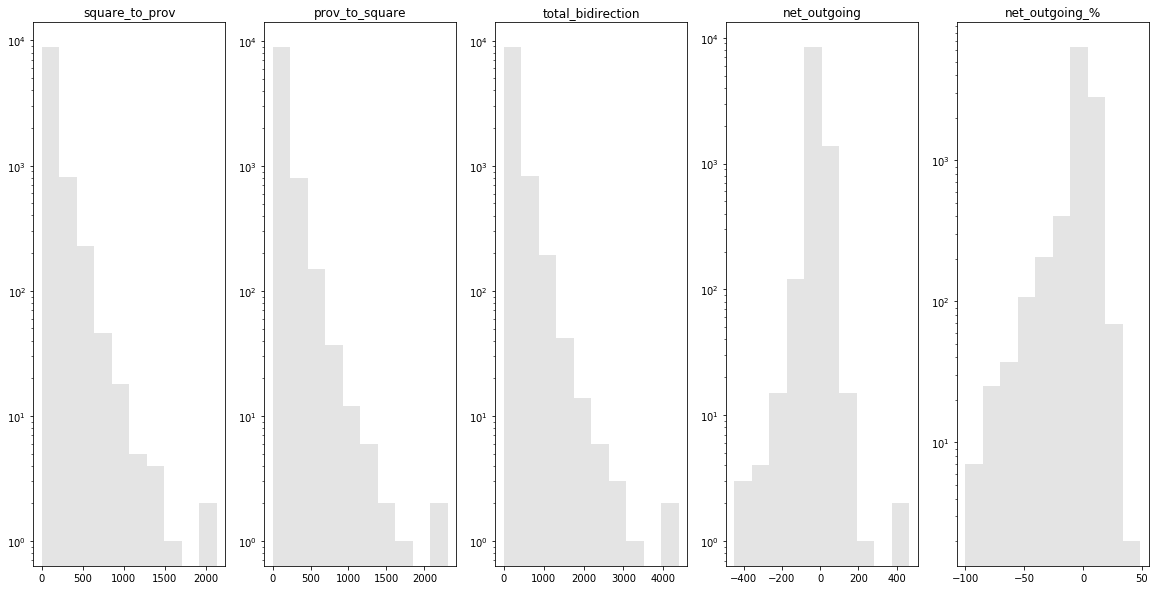

In [9]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 10))

for i, c in enumerate(col):
    ax[i].hist(mi_prov_act[c], facecolor='lightgrey', alpha=0.6)
    ax[i].set_title(c)
    ax[i].set_yscale('log')
        
plt.show()

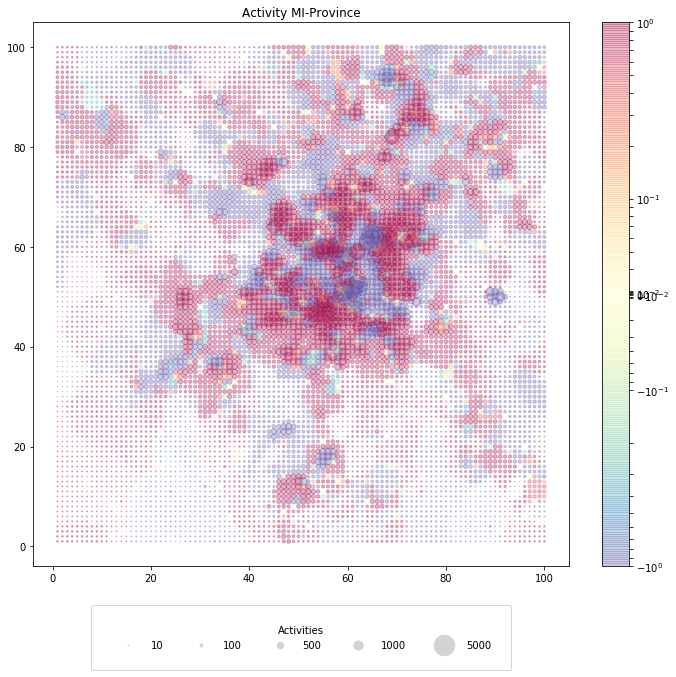

In [10]:
def plot_square_coor(df, s_col, c_col, title):
    """
    Plot the square on a 100x100 board to visualize activity
    """
#     n_min = df[c_col].quantile(0.2)
#     n_max = df[c_col].quantile(0.8)
    plot = plt.scatter(x=df['col'], y=df['row'], 
                       s=df[s_col]/12, c=df[c_col], 
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, 
                                              vmin=-1, vmax=1), 
                       cmap='Spectral_r', alpha=0.3)    
    plt.title(title)
    plt.colorbar(plot)
    legend_label = [10, 100, 500, 1000, 5000]
    legend_box = [plt.scatter([], [], s=i/12, c='lightgrey') for i in legend_label]
    plt.legend(legend_box, legend_label, bbox_to_anchor=(0.5, -0.2), 
               ncol=5, handlelength=3.5, loc=8, borderpad=2, 
               handletextpad=0.5, title='Activities')

fig, ax = plt.subplots(figsize=(12, 10))
plot_square_coor(mi_prov_act, 
                 'total_bidirection', 'net_outgoing_%',
                 'Activity MI-Province')
plt.show()

In [11]:
def top_contact_prov(mi_prov_data, var):
    """
    Identify the top province in the contact, ranking 
    by variable ('total_bidirection' or 'net_outgoing')
    """
    top = mi_prov_data.groupby('province').sum()
    if var == 'net_outgoing':
        top['net_outgoing_%'] = (top['net_outgoing']
                                 / top['total_bidirection'] * 100)
        result = top.sort_values('net_outgoing_%', ascending=True)
    else:
        result = top.sort_values('total_bidirection', ascending=False)
    return result
    
display (top_contact_prov(mi_prov_file, 'total_bidirection').head())
display (top_contact_prov(mi_prov_file, 'net_outgoing').head())

square_id        time_interval  square_to_prov  \
province                                                                 
MILANO                 5557897771  1529474870409773056      654,074.13   
MONZA E DELLA BRIANZA  1637643415   342949335132000000       34,834.68   
PAVIA                   782617019   311930192761800000       15,568.08   
NAPOLI                  627485099   174156668227800000       13,042.79   
BERGAMO                 717874914   175327921459800000       11,019.85   

                       prov_to_square  total_bidirection  net_outgoing  
province                                                                
MILANO                     656,782.17       1,310,856.30     -2,708.04  
MONZA E DELLA BRIANZA       35,019.51          69,854.19       -184.83  
PAVIA                       16,928.81          32,496.89     -1,360.74  
NAPOLI                      12,159.48          25,202.27        883.31  
BERGAMO                     11,459.11          22,478.95       -439.26

square_id      time_interval  square_to_prov  prov_to_square  \
province                                                                    
ASTI          26281229   7550119285200000          263.52          540.64   
ALESSANDRIA   86709062  27829460542800000        1,043.89        1,976.75   
PRATO         23086324   6119792214600000          384.69          554.42   
MESSINA      111757412  29161673706600000        1,564.48        2,087.93   
ORISTANO      12516553   3007332498000000          141.85          188.83   

             total_bidirection  net_outgoing  net_outgoing_%  
province                                                      
ASTI                    804.17       -277.12          -34.46  
ALESSANDRIA           3,020.64       -932.86          -30.88  
PRATO                   939.11       -169.72          -18.07  
MESSINA               3,652.41       -523.45          -14.33  
ORISTANO                330.68        -46.99          -14.21

In [12]:
median_square_activity = mi_prov_act.loc[:, 'total_bidirection'].median()

print (median_square_activity)

92.36474345203762


In [13]:
no_act, low_act, mi_act, hi_act, top_act = (mi_prov_act.loc[:, 'total_bidirection']
                                                       .quantile([0, 0.25, 0.5, 0.75, 1]))

def activity_div(lower, upper, name):
    satisfy_cond = ((mi_prov_act.loc[:, 'total_bidirection'] >= lower)
                    & (mi_prov_act.loc[:, 'total_bidirection'] < upper))
    mi_prov_act.loc[satisfy_cond, 'act_group'] = name

activity_div(no_act, low_act, 'low_activity')
activity_div(low_act, mi_act, 'mild_activity')
activity_div(mi_act, hi_act, 'high_activity')
activity_div(hi_act, top_act, 'center')

mi_prov_grp = {}
for grp in ['center', 'high_activity', 'mild_activity', 'low_activity']:
    is_in_grp = mi_prov_act['act_group'] == grp
    activity_ids = (mi_prov_file.loc[:, 'square_id']
                                .isin(mi_prov_act.loc[is_in_grp, 'square_id'])
                   )
    mi_prov_grp[grp] = mi_prov_file.loc[activity_ids]

for grp in ['center', 'high_activity', 'mild_activity', 'low_activity']:
    display (top_contact_prov(mi_prov_grp[grp], 'total_bidirection').head())

square_id       time_interval  square_to_prov  \
province                                                                
MILANO                 1836921509  422666830285800000      452,139.98   
MONZA E DELLA BRIANZA   608052328  121959779672400000       19,732.39   
PAVIA                   282040477   76136169715200000        9,227.56   
NAPOLI                  274434202   66370088676000000        9,576.16   
BERGAMO                 275342095   60997181274000000        7,099.20   

                       prov_to_square  total_bidirection  net_outgoing  
province                                                                
MILANO                     451,108.72         903,248.69      1,031.26  
MONZA E DELLA BRIANZA       19,608.53          39,340.92        123.86  
PAVIA                        9,937.99          19,165.55       -710.42  
NAPOLI                       8,666.19          18,242.35        909.97  
BERGAMO                      7,505.02          14,604.22       -405.82

square_id       time_interval  square_to_prov  \
province                                                                
MILANO                 1736136768  390912048652200000      127,383.31   
MONZA E DELLA BRIANZA   659668613  119165383339200000       12,413.47   
PAVIA                   207652661   62906168964000000        3,067.86   
BERGAMO                 254139640   52747106745000000        2,605.02   
NAPOLI                  187838248   44845724921400000        2,187.70   

                       prov_to_square  total_bidirection  net_outgoing  
province                                                                
MILANO                     129,406.12         256,789.43     -2,022.81  
MONZA E DELLA BRIANZA       12,503.20          24,916.67        -89.73  
PAVIA                        3,357.27           6,425.13       -289.41  
BERGAMO                      2,647.04           5,252.06        -42.02  
NAPOLI                       2,120.84           4,308.54         66.86

square_id       time_interval  square_to_prov  \
province                                                                
MILANO                 1333233384  375304267427400000       54,300.04   
MONZA E DELLA BRIANZA   285712276   66468110740800000        2,192.65   
PAVIA                   177122462   70991627977800000        1,861.89   
BERGAMO                 147828550   37875084066000000          988.71   
VARESE                  165177887   38161443779400000          901.64   

                       prov_to_square  total_bidirection  net_outgoing  
province                                                                
MILANO                      56,675.27         110,975.31     -2,375.22  
MONZA E DELLA BRIANZA        2,371.21           4,563.86       -178.57  
PAVIA                        2,111.16           3,973.05       -249.27  
BERGAMO                      1,021.46           2,010.18        -32.75  
VARESE                       1,078.42           1,980.05       -176.78

square_id       time_interval  square_to_prov  \
province                                                               
MILANO                 650986790  340425726985200000       18,853.19   
PAVIA                  115574335  101835360255600000        1,367.92   
MONZA E DELLA BRIANZA   83988275   35296578948600000          444.38   
LODI                    32887150   27367452417600000          355.06   
VARESE                  58277240   26240054425200000          325.08   

                       prov_to_square  total_bidirection  net_outgoing  
province                                                                
MILANO                      18,126.86          36,980.04        726.33  
PAVIA                        1,467.54           2,835.46        -99.62  
MONZA E DELLA BRIANZA          489.63             934.01        -45.26  
LODI                           389.96             745.02        -34.90  
VARESE                         321.25             646.33          3.84

In [14]:
for grp in ['center', 'high_activity', 'mild_activity', 'low_activity']:
    display (top_contact_prov(mi_prov_grp[grp], 'net_outgoing').head())

square_id     time_interval  square_to_prov  prov_to_square  \
province                                                                   
ASTI          11241887  2720975902200000          171.78          367.75   
ALESSANDRIA   36536655  9730227882600000          734.42        1,390.07   
PRATO         10115081  2225759713200000          254.55          389.34   
BELLUNO       12121518  2994873156600000          295.81          398.73   
VICENZA       30313043  6862617351000000          673.84          898.18   

             total_bidirection  net_outgoing  net_outgoing_%  
province                                                      
ASTI                    539.52       -195.97          -36.32  
ALESSANDRIA           2,124.50       -655.65          -30.86  
PRATO                   643.89       -134.79          -20.93  
BELLUNO                 694.54       -102.92          -14.82  
VICENZA               1,572.02       -224.35          -14.27

square_id     time_interval  square_to_prov  prov_to_square  \
province                                                                       
MEDIO CAMPIDANO    1294009   225480711000000            6.74           15.29   
ALESSANDRIA       23442637  6154358003400000          185.37          340.84   
ASTI               7604629  1752656245200000           55.91           99.37   
PRATO              6882041  1554853246800000           64.12          104.65   
MESSINA           32533222  7530771180600000          223.15          355.87   

                 total_bidirection  net_outgoing  net_outgoing_%  
province                                                          
MEDIO CAMPIDANO              22.03         -8.56          -38.85  
ALESSANDRIA                 526.21       -155.48          -29.55  
ASTI                        155.28        -43.46          -27.99  
PRATO                       168.76        -40.53          -24.02  
MESSINA                     579.02       -132.72          -22.92

square_id     time_interval  square_to_prov  prov_to_square  \
province                                                                       
ORISTANO           2212873   569924968200000            4.30           21.70   
MEDIO CAMPIDANO     811159   189514541400000            1.93            6.89   
GORIZIA            2854800   647390248200000            7.22           24.61   
ASTI               5381245  1747122641400000           19.30           53.39   
OLBIA-TEMPIO       9877762  3236924758200000           49.67          133.12   

                 total_bidirection  net_outgoing  net_outgoing_%  
province                                                          
ORISTANO                     26.00        -17.40          -66.92  
MEDIO CAMPIDANO               8.82         -4.96          -56.27  
GORIZIA                      31.83        -17.39          -54.65  
ASTI                         72.69        -34.09          -46.90  
OLBIA-TEMPIO                182.79        -83.45          -45.65

square_id    time_interval  square_to_prov  prov_to_square  \
province                                                                      
MEDIO CAMPIDANO     197867   37349819400000            0.01            1.37   
ORISTANO           1188808  373492249800000            0.63            9.24   
L'AQUILA           1317410  814776625200000            2.18           12.16   
NUORO               844032  207497168400000            0.82            3.73   
GORIZIA             443039  195046179600000            1.38            4.36   

                 total_bidirection  net_outgoing  net_outgoing_%  
province                                                          
MEDIO CAMPIDANO               1.38         -1.37          -99.13  
ORISTANO                      9.88         -8.61          -87.15  
L'AQUILA                     14.34         -9.99          -69.66  
NUORO                         4.56         -2.91          -63.82  
GORIZIA                       5.74         -2.98          -51.85

In [15]:
col_names = ['square_id', 'time_interval', 'country_code',
             'sms_in', 'sms_out', 'call_in', 'call_out', 'internet_traffic']

mi_file = pd.read_csv('all/milano/sms-call-internet-mi-2013-11-01.txt',
                      sep='\t', header=None, names=col_names)
mi_file.head()

square_id  time_interval  country_code  sms_in  sms_out  call_in  call_out  \
0          1  1383260400000             0    0.08      nan      nan       nan   
1          1  1383260400000            39    0.14     0.16     0.16      0.05   
2          1  1383261000000             0    0.14      nan      nan      0.03   
3          1  1383261000000            33     nan      nan      nan       nan   
4          1  1383261000000            39    0.28     0.12     0.19      0.13   

   internet_traffic  
0               nan  
1             11.03  
2               nan  
3              0.03  
4             11.10

In [16]:
mi_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842625 entries, 0 to 4842624
Data columns (total 8 columns):
square_id           int64
time_interval       int64
country_code        int64
sms_in              float64
sms_out             float64
call_in             float64
call_out            float64
internet_traffic    float64
dtypes: float64(5), int64(3)
memory usage: 295.6 MB


In [17]:
mi_file['datetime'] = pd.to_datetime(mi_file['time_interval'], unit='ms')
mi_file.fillna(0, inplace=True)

mi_file['total_bidirection_sms'] = mi_file['sms_in'] + mi_file['sms_out']
mi_file['total_bidirection_call'] = mi_file['call_in'] + mi_file['call_out']
mi_file['activity_in'] = mi_file['sms_in'] + mi_file['call_in']
mi_file['activity_out'] = mi_file['sms_out'] + mi_file['call_out']
mi_file['net_outgoing_call'] = mi_file['call_out'] - mi_file['call_in']
mi_file['net_outgoing_sms'] = mi_file['sms_out'] - mi_file['sms_in']
mi_file['net_out_call_sms'] = mi_file['activity_out'] - mi_file['activity_in']
mi_file['total_call_sms'] = (mi_file['sms_in'] + mi_file['sms_out'] 
                             + mi_file['call_in'] + mi_file['call_out'])

mi_file.head()

square_id  time_interval  country_code  sms_in  sms_out  call_in  call_out  \
0          1  1383260400000             0    0.08     0.00     0.00      0.00   
1          1  1383260400000            39    0.14     0.16     0.16      0.05   
2          1  1383261000000             0    0.14     0.00     0.00      0.03   
3          1  1383261000000            33    0.00     0.00     0.00      0.00   
4          1  1383261000000            39    0.28     0.12     0.19      0.13   

   internet_traffic            datetime  total_bidirection_sms  \
0              0.00 2013-10-31 23:00:00                   0.08   
1             11.03 2013-10-31 23:00:00                   0.30   
2              0.00 2013-10-31 23:10:00                   0.14   
3              0.03 2013-10-31 23:10:00                   0.00   
4             11.10 2013-10-31 23:10:00                   0.40   

   total_bidirection_call  activity_in  activity_out  net_outgoing_call  \
0                    0.00         0.08          0.00               0.00   
1                    0.21         0.30          0.21              -0.11   
2                    0.03         0.14          0.03               0.03   
3                    0.00         0.00          0.00               0.00   
4                    0.32         0.47          0.25              -0.06   

   net_outgoing_sms  net_out_call_sms  total_call_sms  
0             -0.08             -0.08            0.08  
1              0.01             -0.09            0.51  
2             -0.14             -0.11            0.16  
3              0.00              0.00            0.00  
4             -0.16             -0.21            0.72

In [18]:
mi_file.loc[:, 'country_code'].value_counts().head(10)

39     1439981
0      1159632
33      210334
46      208713
49      165341
20      155336
41      145551
44      117362
40       98367
380      82571
Name: country_code, dtype: int64

In [19]:
mi_file.sort_values('net_outgoing_call').head(10)

square_id  time_interval  country_code  sms_in  sms_out  call_in  \
2133385       5161  1383325800000            39  151.03    72.10   190.99   
2133122       5161  1383320400000            39  202.72    91.88   178.50   
2637579       5957  1383299400000            39   29.97    17.22    70.14   
2133179       5161  1383321600000            39  176.19   104.88   188.80   
1714872       4464  1383269400000            39    1.32     2.28    49.97   
3896221       8169  1383319200000            39   31.79     8.36    71.02   
2200060       5262  1383322200000            39   67.44    56.73    91.93   
2135081       5162  1383318600000            39   72.22    50.17    80.37   
1714869       4464  1383268800000            39    3.93     8.05    38.93   
2132951       5161  1383316800000            39  147.49    72.50   141.93   

         call_out  internet_traffic            datetime  \
2133385    131.35          4,509.69 2013-11-01 17:10:00   
2133122    126.56          4,580.27 2013-11-01 15:40:00   
2637579     23.55            588.32 2013-11-01 09:50:00   
2133179    144.89          4,449.87 2013-11-01 16:00:00   
1714872      7.18            195.78 2013-11-01 01:30:00   
3896221     28.96            794.76 2013-11-01 15:20:00   
2200060     50.45          1,548.99 2013-11-01 16:10:00   
2135081     42.71          1,790.59 2013-11-01 15:10:00   
1714869      2.28            165.17 2013-11-01 01:20:00   
2132951    106.03          3,529.08 2013-11-01 14:40:00   

         total_bidirection_sms  total_bidirection_call  activity_in  \
2133385                 223.13                  322.34       342.02   
2133122                 294.60                  305.06       381.21   
2637579                  47.19                   93.69       100.11   
2133179                 281.07                  333.69       364.99   
1714872                   3.60                   57.15        51.29   
3896221                  40.15                   99.98       102.81   
2200060                 124.17                  142.39       159.37   
2135081                 122.39                  123.08       152.59   
1714869                  11.98                   41.21        42.86   
2132951                 219.99                  247.96       289.42   

         activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
2133385        203.45             -59.64            -78.93           -138.57   
2133122        218.44             -51.94           -110.84           -162.77   
2637579         40.77             -46.58            -12.75            -59.34   
2133179        249.77             -43.91            -71.31           -115.22   
1714872          9.46             -42.79              0.97            -41.83   
3896221         37.32             -42.06            -23.43            -65.49   
2200060        107.18             -41.48            -10.71            -52.19   
2135081         92.88             -37.67            -22.05            -59.71   
1714869         10.34             -36.65              4.12            -32.52   
2132951        178.53             -35.90            -74.99           -110.89   

         total_call_sms  
2133385          545.46  
2133122          599.65  
2637579          140.88  
2133179          614.76  
1714872           60.75  
3896221          140.12  
2200060          266.56  
2135081          245.47  
1714869           53.19  
2132951          467.95

In [20]:
mi_file.sort_values('net_outgoing_sms').head(10)

square_id  time_interval  country_code  sms_in  sms_out  call_in  \
2133345       5161  1383325200000             0  193.10     2.70     0.00   
2646118       5965  1383264600000             0  234.02    44.25     0.00   
2133141       5161  1383321000000             0  174.47     1.25     0.00   
2646122       5965  1383265200000             0  205.32    42.30     0.00   
2133028       5161  1383318600000             0  158.09     0.00     0.00   
2133058       5161  1383319200000             0  174.37    18.60     0.42   
2133319       5161  1383324600000             0  156.99     2.45     0.00   
2133111       5161  1383320400000             0  167.75    13.34     0.00   
2133232       5161  1383322800000             0  154.29     0.20     0.00   
2646334       5965  1383286200000             0  185.98    34.04     0.00   

         call_out  internet_traffic            datetime  \
2133345      0.00              0.00 2013-11-01 17:00:00   
2646118      3.23              0.00 2013-11-01 00:10:00   
2133141      0.02              0.00 2013-11-01 15:50:00   
2646122      0.00              0.00 2013-11-01 00:20:00   
2133028      4.89              0.00 2013-11-01 15:10:00   
2133058      5.20              0.00 2013-11-01 15:20:00   
2133319      2.75              0.00 2013-11-01 16:50:00   
2133111      2.75              0.00 2013-11-01 15:40:00   
2133232      0.00              0.00 2013-11-01 16:20:00   
2646334      0.00              0.00 2013-11-01 06:10:00   

         total_bidirection_sms  total_bidirection_call  activity_in  \
2133345                 195.80                    0.00       193.10   
2646118                 278.27                    3.23       234.02   
2133141                 175.72                    0.02       174.47   
2646122                 247.62                    0.00       205.32   
2133028                 158.09                    4.89       158.09   
2133058                 192.97                    5.62       174.79   
2133319                 159.44                    2.75       156.99   
2133111                 181.09                    2.75       167.75   
2133232                 154.49                    0.00       154.29   
2646334                 220.01                    0.00       185.98   

         activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
2133345          2.70               0.00           -190.41           -190.41   
2646118         47.47               3.23           -189.77           -186.54   
2133141          1.27               0.02           -173.23           -173.20   
2646122         42.30               0.00           -163.02           -163.02   
2133028          4.89               4.89           -158.09           -153.20   
2133058         23.80               4.77           -155.76           -150.99   
2133319          5.20               2.75           -154.55           -151.80   
2133111         16.09               2.75           -154.41           -151.66   
2133232          0.20               0.00           -154.09           -154.09   
2646334         34.04               0.00           -151.94           -151.94   

         total_call_sms  
2133345          195.80  
2646118          281.49  
2133141          175.75  
2646122          247.62  
2133028          162.98  
2133058          198.59  
2133319          162.19  
2133111          183.84  
2133232          154.49  
2646334          220.01

In [21]:
mi_file.loc[:, 'first_digit'] = mi_file.loc[:, 'country_code'].apply(lambda x: str(x)[0])

first_digit = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
country = ['Unknown', 'NA', 'AF', 'EU', 'EU', 'SA', 'AP', 'RU', 'EA', 'ME']

for dgt, ctry in zip(first_digit, country):
        mi_file.loc[mi_file['first_digit'] == dgt, 'country'] = ctry

display (mi_file.groupby('country')['total_call_sms'].sum())

country
AF            75,381.26
AP            20,280.27
EA            42,814.52
EU        11,330,000.84
ME            26,569.58
NA            15,712.56
RU            22,003.16
SA            16,470.40
Unknown    1,699,147.03
Name: total_call_sms, dtype: float64

In [22]:
def map_to_square(var, var_list):
    map_ = {}
    for x in var_list:
        mi_map = (mi_file.groupby(['square_id', var]).sum()
                         .reset_index())
        map_[x] = (mi_map.loc[mi_map[var]==x]
                         .merge(squares_loc, on='square_id'))
        map_[x]['net_out_%'] = (map_[x]['net_out_call_sms'] 
                                / map_[x]['total_call_sms'] * 100)
        map_[x]['net_outcall_%'] = (map_[x]['net_outgoing_call'] 
                                    / map_[x]['total_bidirection_call'] * 100)
        map_[x]['net_outsms_%'] = (map_[x]['net_outgoing_sms'] 
                                   / map_[x]['total_bidirection_sms'] * 100)
    return map_, mi_map

In [23]:
ctr_map, mi_by_country = map_to_square('country', country)

display (mi_by_country.groupby('country').sum()
                      .sort_values('total_bidirection_call', ascending=False))

display (mi_by_country.groupby('country').sum()
                      .sort_values('total_bidirection_sms', ascending=False))

display (mi_by_country.groupby('country').sum()
                      .sort_values('internet_traffic', ascending=False))

square_id        time_interval  country_code       sms_in  \
country                                                              
EU        50005000  4009834520952008704     201985480 2,983,158.71   
Unknown   50005000  1604128045192797696             0 1,562,647.96   
AF        49849759   381416374313400000      29614565    13,654.24   
EA        48490209   193217021365800000     463908874     8,865.08   
ME        46542296   145853248944600000      33481775     8,019.32   
SA        45943162   106670302121400000      20488383     3,432.44   
AP        41091592    93082180144800000       6333156     8,727.74   
RU        39490576    59620681057200000      16375861     9,175.26   
NA        45968086   105016899606600000      73272881     8,706.58   

             sms_out      call_in     call_out  internet_traffic  \
country                                                            
EU      2,747,455.79 2,593,296.83 3,006,089.52     82,435,896.78   
Unknown    55,455.82     5,748.79    75,294.46             20.74   
AF          2,023.98     5,861.52    53,841.52          1,391.33   
EA          2,542.48     2,832.64    28,574.32          8,812.65   
ME          2,570.02     4,968.77    11,011.46          7,185.57   
SA          1,748.60     2,490.61     8,798.75          4,193.41   
AP          1,411.65       734.70     9,406.18          2,088.97   
RU          6,275.22     4,794.75     1,757.94          5,726.51   
NA          2,946.53     2,071.28     1,988.17         13,930.63   

         total_bidirection_sms  total_bidirection_call  activity_in  \
country                                                               
EU                5,730,614.50            5,599,386.34 5,576,455.53   
Unknown           1,618,103.78               81,043.25 1,568,396.75   
AF                   15,678.22               59,703.04    19,515.76   
EA                   11,407.56               31,406.96    11,697.72   
ME                   10,589.35               15,980.23    12,988.09   
SA                    5,181.04               11,289.36     5,923.05   
AP                   10,139.39               10,140.88     9,462.45   
RU                   15,450.47                6,552.68    13,970.00   
NA                   11,653.11                4,059.45    10,777.86   

         activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
country                                                                        
EU       5,753,545.31         412,792.69       -235,702.91        177,089.78   
Unknown    130,750.28          69,545.67     -1,507,192.14     -1,437,646.47   
AF          55,865.50          47,980.01        -11,630.27         36,349.74   
EA          31,116.80          25,741.68         -6,322.60         19,419.08   
ME          13,581.48           6,042.69         -5,449.30            593.39   
SA          10,547.35           6,308.14         -1,683.84          4,624.30   
AP          10,817.82           8,671.47         -7,316.10          1,355.38   
RU           8,033.16          -3,036.81         -2,900.04         -5,936.84   
NA           4,934.69             -83.11         -5,760.06         -5,843.17   

         total_call_sms  
country                  
EU        11,330,000.84  
Unknown    1,699,147.03  
AF            75,381.26  
EA            42,814.52  
ME            26,569.58  
SA            16,470.40  
AP            20,280.27  
RU            22,003.16  
NA            15,712.56

square_id        time_interval  country_code       sms_in  \
country                                                              
EU        50005000  4009834520952008704     201985480 2,983,158.71   
Unknown   50005000  1604128045192797696             0 1,562,647.96   
AF        49849759   381416374313400000      29614565    13,654.24   
RU        39490576    59620681057200000      16375861     9,175.26   
NA        45968086   105016899606600000      73272881     8,706.58   
EA        48490209   193217021365800000     463908874     8,865.08   
ME        46542296   145853248944600000      33481775     8,019.32   
AP        41091592    93082180144800000       6333156     8,727.74   
SA        45943162   106670302121400000      20488383     3,432.44   

             sms_out      call_in     call_out  internet_traffic  \
country                                                            
EU      2,747,455.79 2,593,296.83 3,006,089.52     82,435,896.78   
Unknown    55,455.82     5,748.79    75,294.46             20.74   
AF          2,023.98     5,861.52    53,841.52          1,391.33   
RU          6,275.22     4,794.75     1,757.94          5,726.51   
NA          2,946.53     2,071.28     1,988.17         13,930.63   
EA          2,542.48     2,832.64    28,574.32          8,812.65   
ME          2,570.02     4,968.77    11,011.46          7,185.57   
AP          1,411.65       734.70     9,406.18          2,088.97   
SA          1,748.60     2,490.61     8,798.75          4,193.41   

         total_bidirection_sms  total_bidirection_call  activity_in  \
country                                                               
EU                5,730,614.50            5,599,386.34 5,576,455.53   
Unknown           1,618,103.78               81,043.25 1,568,396.75   
AF                   15,678.22               59,703.04    19,515.76   
RU                   15,450.47                6,552.68    13,970.00   
NA                   11,653.11                4,059.45    10,777.86   
EA                   11,407.56               31,406.96    11,697.72   
ME                   10,589.35               15,980.23    12,988.09   
AP                   10,139.39               10,140.88     9,462.45   
SA                    5,181.04               11,289.36     5,923.05   

         activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
country                                                                        
EU       5,753,545.31         412,792.69       -235,702.91        177,089.78   
Unknown    130,750.28          69,545.67     -1,507,192.14     -1,437,646.47   
AF          55,865.50          47,980.01        -11,630.27         36,349.74   
RU           8,033.16          -3,036.81         -2,900.04         -5,936.84   
NA           4,934.69             -83.11         -5,760.06         -5,843.17   
EA          31,116.80          25,741.68         -6,322.60         19,419.08   
ME          13,581.48           6,042.69         -5,449.30            593.39   
AP          10,817.82           8,671.47         -7,316.10          1,355.38   
SA          10,547.35           6,308.14         -1,683.84          4,624.30   

         total_call_sms  
country                  
EU        11,330,000.84  
Unknown    1,699,147.03  
AF            75,381.26  
RU            22,003.16  
NA            15,712.56  
EA            42,814.52  
ME            26,569.58  
AP            20,280.27  
SA            16,470.40

square_id        time_interval  country_code       sms_in  \
country                                                              
EU        50005000  4009834520952008704     201985480 2,983,158.71   
NA        45968086   105016899606600000      73272881     8,706.58   
EA        48490209   193217021365800000     463908874     8,865.08   
ME        46542296   145853248944600000      33481775     8,019.32   
RU        39490576    59620681057200000      16375861     9,175.26   
SA        45943162   106670302121400000      20488383     3,432.44   
AP        41091592    93082180144800000       6333156     8,727.74   
AF        49849759   381416374313400000      29614565    13,654.24   
Unknown   50005000  1604128045192797696             0 1,562,647.96   

             sms_out      call_in     call_out  internet_traffic  \
country                                                            
EU      2,747,455.79 2,593,296.83 3,006,089.52     82,435,896.78   
NA          2,946.53     2,071.28     1,988.17         13,930.63   
EA          2,542.48     2,832.64    28,574.32          8,812.65   
ME          2,570.02     4,968.77    11,011.46          7,185.57   
RU          6,275.22     4,794.75     1,757.94          5,726.51   
SA          1,748.60     2,490.61     8,798.75          4,193.41   
AP          1,411.65       734.70     9,406.18          2,088.97   
AF          2,023.98     5,861.52    53,841.52          1,391.33   
Unknown    55,455.82     5,748.79    75,294.46             20.74   

         total_bidirection_sms  total_bidirection_call  activity_in  \
country                                                               
EU                5,730,614.50            5,599,386.34 5,576,455.53   
NA                   11,653.11                4,059.45    10,777.86   
EA                   11,407.56               31,406.96    11,697.72   
ME                   10,589.35               15,980.23    12,988.09   
RU                   15,450.47                6,552.68    13,970.00   
SA                    5,181.04               11,289.36     5,923.05   
AP                   10,139.39               10,140.88     9,462.45   
AF                   15,678.22               59,703.04    19,515.76   
Unknown           1,618,103.78               81,043.25 1,568,396.75   

         activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
country                                                                        
EU       5,753,545.31         412,792.69       -235,702.91        177,089.78   
NA           4,934.69             -83.11         -5,760.06         -5,843.17   
EA          31,116.80          25,741.68         -6,322.60         19,419.08   
ME          13,581.48           6,042.69         -5,449.30            593.39   
RU           8,033.16          -3,036.81         -2,900.04         -5,936.84   
SA          10,547.35           6,308.14         -1,683.84          4,624.30   
AP          10,817.82           8,671.47         -7,316.10          1,355.38   
AF          55,865.50          47,980.01        -11,630.27         36,349.74   
Unknown    130,750.28          69,545.67     -1,507,192.14     -1,437,646.47   

         total_call_sms  
country                  
EU        11,330,000.84  
NA            15,712.56  
EA            42,814.52  
ME            26,569.58  
RU            22,003.16  
SA            16,470.40  
AP            20,280.27  
AF            75,381.26  
Unknown    1,699,147.03

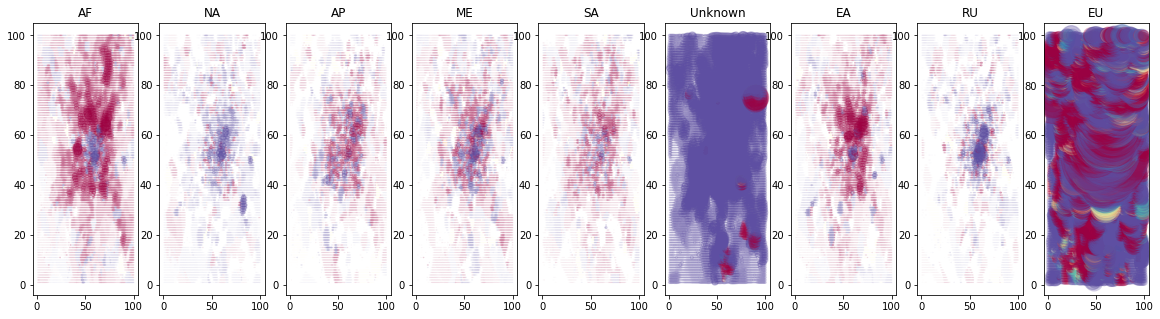

In [24]:
country_u = list(set(country))

fig, ax = plt.subplots(ncols=len(country_u), figsize=(20, 5))

def plot_map(df, s_col, c_col, var_list):
    for i, var in enumerate(var_list):
#         n_min = df[var][c_col].quantile(0.25)
#         n_max = df[var][c_col].quantile(0.75)
        ax[i].scatter(x=df[var]['col'], y=df[var]['row'], 
                      s=df[var][s_col]/4, c=df[var][c_col], 
                      norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, 
                                             vmin=-1, vmax=1), 
                      cmap='Spectral_r', alpha=0.2)
        ax[i].set_title(var)

plot_map(ctr_map, 'total_call_sms', 'net_out_%', country_u)
plt.show()

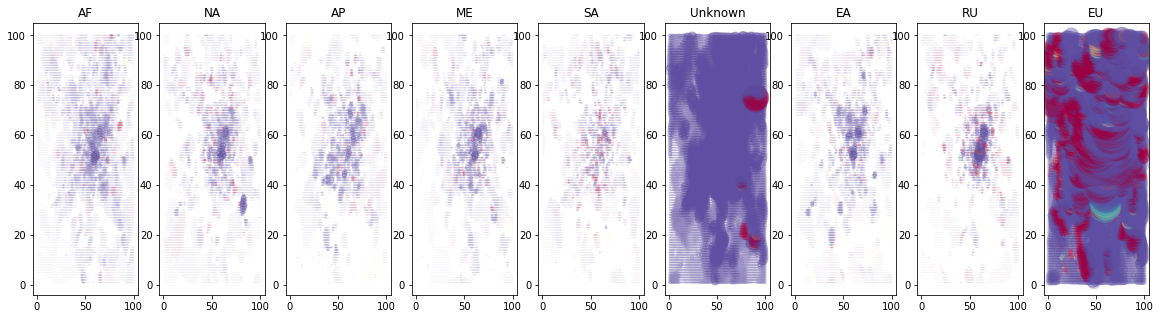

In [25]:
fig, ax = plt.subplots(ncols=len(country_u), figsize=(20, 5))
plot_map(ctr_map, 'total_bidirection_sms', 'net_outsms_%', country_u)
plt.show()

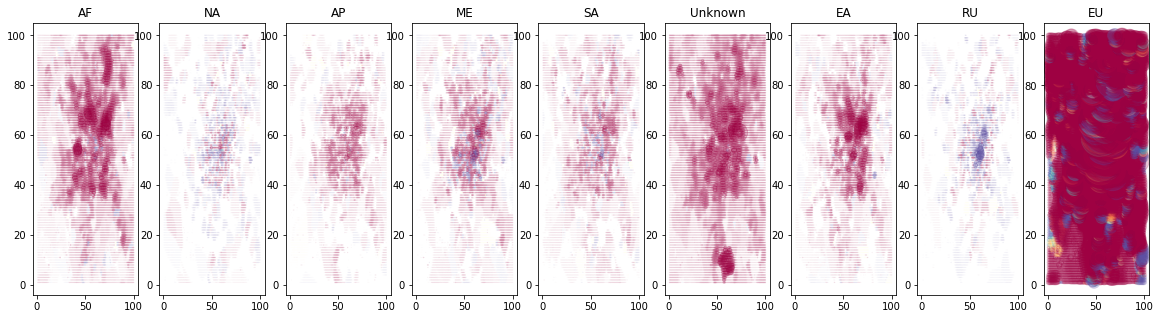

In [26]:
fig, ax = plt.subplots(ncols=len(country_u), figsize=(20, 5))
plot_map(ctr_map, 'total_bidirection_call', 'net_outcall_%', country_u)
plt.show()

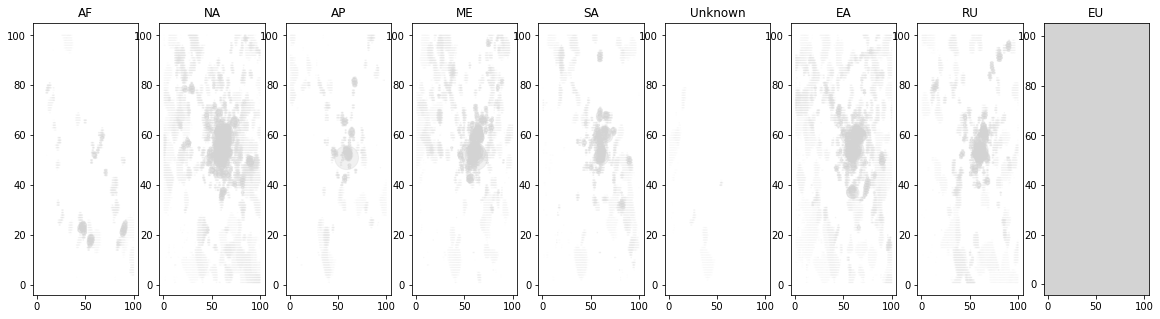

In [27]:
fig, ax = plt.subplots(ncols=len(country_u), figsize=(20, 5))

def plot_map_internet(df, var_list, s_adj=1):
    for i, var in enumerate(var_list):
        ax[i].scatter(x=df[var]['col'], y=df[var]['row'], 
                      s=df[var]['internet_traffic']/s_adj, 
                      c='lightgrey', alpha=0.3)
        ax[i].set_title(var)

plot_map_internet(ctr_map, country_u)
plt.show()

In [28]:
time = mi_file['datetime'].dt.hour

mi_file.loc[(time >= 24) | (time < 2), 'time_period'] = 'mnight_hr'
mi_file.loc[(time >= 2) & (time < 8), 'time_period'] = 'night_hr'
mi_file.loc[(time >= 8) & (time < 20), 'time_period'] = 'work_hr'
mi_file.loc[(time >= 20) & (time <= 24), 'time_period'] = 'free_hr'

display (mi_file.groupby('time_period').sum())

square_id        time_interval  country_code       sms_in  \
time_period                                                                
free_hr       3796366141  1013903132437730816     109971472   614,019.14   
mnight_hr     1306594017   351775901519400000      56779350   135,106.45   
night_hr      4440928756  1193452375207306752     115316019   424,413.52   
work_hr      15608913966  4139707864551910912     563394134 3,432,848.22   

                 sms_out      call_in     call_out  internet_traffic  \
time_period                                                            
free_hr       482,057.25   244,945.13   298,632.92     14,726,491.61   
mnight_hr     125,976.30    45,492.53    58,779.65      5,756,274.85   
night_hr      324,483.14   135,010.24   200,682.77     13,785,212.38   
work_hr     1,889,913.39 2,197,351.97 2,638,666.97     48,211,267.75   

             total_bidirection_sms  total_bidirection_call  activity_in  \
time_period                                                               
free_hr               1,096,076.39              543,578.05   858,964.27   
mnight_hr               261,082.75              104,272.19   180,598.99   
night_hr                748,896.66              335,693.02   559,423.77   
work_hr               5,322,761.61            4,836,018.94 5,630,200.19   

             activity_out  net_outgoing_call  net_outgoing_sms  \
time_period                                                      
free_hr        780,690.17          53,687.78       -131,961.88   
mnight_hr      184,755.95          13,287.12         -9,130.15   
night_hr       525,165.91          65,672.53        -99,930.39   
work_hr      4,528,580.36         441,315.00     -1,542,934.83   

             net_out_call_sms  total_call_sms  
time_period                                    
free_hr            -78,274.10    1,639,654.44  
mnight_hr            4,156.97      365,354.94  
night_hr           -34,257.86    1,084,589.68  
work_hr         -1,101,619.83   10,158,780.55

In [29]:
mi_total_act = mi_file.groupby('square_id').sum()

mi_total_act.head()

time_interval  country_code  sms_in  sms_out  call_in  call_out  \
square_id                                                                      
1          478624264800000         14990   78.71    45.89    41.11     48.25   
2          478624264800000         14990   79.85    46.48    41.74     49.14   
3          457874651400000         14179   81.06    47.11    42.42     50.09   
4          478624264800000         14990   75.42    44.17    39.27     45.66   
5          489690669600000         15895   70.11    41.05    36.86     42.79   

           internet_traffic  total_bidirection_sms  total_bidirection_call  \
square_id                                                                    
1                  1,507.05                 124.60                   89.35   
2                  1,512.86                 126.33                   90.88   
3                  1,519.05                 128.17                   92.50   
4                  1,490.22                 119.58                   84.94   
5                  1,356.85                 111.17                   79.65   

           activity_in  activity_out  net_outgoing_call  net_outgoing_sms  \
square_id                                                                   
1               119.82         94.13               7.14            -32.82   
2               121.59         95.62               7.39            -33.37   
3               123.47         97.20               7.67            -33.94   
4               114.69         89.83               6.39            -31.25   
5               106.97         83.84               5.93            -29.06   

           net_out_call_sms  total_call_sms  
square_id                                    
1                    -25.69          213.95  
2                    -25.97          217.21  
3                    -26.27          220.67  
4                    -24.86          204.52  
5                    -23.13          190.82

In [30]:
mi_total_act['net_outcall_%'] = (mi_total_act['net_outgoing_call'] 
                                 / mi_total_act['total_bidirection_call'] * 100)
mi_total_act['net_outsms_%'] = (mi_total_act['net_outgoing_sms'] 
                                / mi_total_act['total_bidirection_sms'] * 100)
mi_total_act['net_out_%'] = (mi_total_act['net_out_call_sms'] 
                            / mi_total_act['total_call_sms'] * 100)

mi_total_act = mi_total_act.merge(squares_loc, on='square_id')

print (mi_total_act.head())

   square_id    time_interval  country_code  sms_in  sms_out  call_in  \
0          1  478624264800000         14990   78.71    45.89    41.11   
1          2  478624264800000         14990   79.85    46.48    41.74   
2          3  457874651400000         14179   81.06    47.11    42.42   
3          4  478624264800000         14990   75.42    44.17    39.27   
4          5  489690669600000         15895   70.11    41.05    36.86   

   call_out  internet_traffic  total_bidirection_sms  total_bidirection_call  \
0     48.25          1,507.05                 124.60                   89.35   
1     49.14          1,512.86                 126.33                   90.88   
2     50.09          1,519.05                 128.17                   92.50   
3     45.66          1,490.22                 119.58                   84.94   
4     42.79          1,356.85                 111.17                   79.65   

  ...   activity_out  net_outgoing_call  net_outgoing_sms  net_out_call_sms  \
0

In [31]:
mi_total_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
square_id                 10000 non-null int64
time_interval             10000 non-null int64
country_code              10000 non-null int64
sms_in                    10000 non-null float64
sms_out                   10000 non-null float64
call_in                   10000 non-null float64
call_out                  10000 non-null float64
internet_traffic          10000 non-null float64
total_bidirection_sms     10000 non-null float64
total_bidirection_call    10000 non-null float64
activity_in               10000 non-null float64
activity_out              10000 non-null float64
net_outgoing_call         10000 non-null float64
net_outgoing_sms          10000 non-null float64
net_out_call_sms          10000 non-null float64
total_call_sms            10000 non-null float64
net_outcall_%             10000 non-null float64
net_outsms_%              9998 non-null float64
net_out_%        

In [32]:
mi_total_act.loc[mi_total_act['net_outsms_%'].isnull()]

square_id    time_interval  country_code  sms_in  sms_out  call_in  \
5238       5239  356893588800000         17936    0.00     0.00     0.00   
5338       5339  449575316400000         23915    0.00     0.00     0.00   

      call_out  internet_traffic  total_bidirection_sms  \
5238    476.19             47.79                   0.00   
5338    487.50             79.57                   0.00   

      total_bidirection_call  ...   activity_out  net_outgoing_call  \
5238                  476.19  ...         476.19             476.19   
5338                  487.50  ...         487.50             487.50   

      net_outgoing_sms  net_out_call_sms  total_call_sms  net_outcall_%  \
5238              0.00            476.19          476.19         100.00   
5338              0.00            487.50          487.50         100.00   

      net_outsms_%  net_out_%  col   row  
5238           nan     100.00   39 53.00  
5338           nan     100.00   39 54.00  

[2 rows x 21 columns]

In [33]:
mi_total_act['net_outsms_%'].fillna(0, inplace=True)

mi_total_act.describe()

square_id            time_interval  country_code    sms_in   sms_out  \
count  10,000.00                10,000.00     10,000.00 10,000.00 10,000.00   
mean    5,000.50   669,883,927,369,856.88     84,546.10    460.64    282.24   
std     2,886.90   248,266,154,212,358.06    105,833.31    716.67    457.91   
min         1.00   257,294,832,000,000.00      5,740.00      0.00      0.00   
25%     2,500.75   502,141,353,450,000.00     22,098.50     85.56     51.74   
50%     5,000.50   622,488,727,500,000.00     39,799.00    225.79    130.72   
75%     7,500.25   770,501,681,850,000.00    108,548.00    506.43    307.41   
max    10,000.00 3,310,259,745,600,000.00    833,211.00 16,448.39  8,343.75   

        call_in  call_out  internet_traffic  total_bidirection_sms  \
count 10,000.00 10,000.00         10,000.00              10,000.00   
mean     262.28    319.68          8,247.92                 742.88   
std      384.84    465.26         12,293.34               1,130.57   
min        0.00      1.31             47.79                   0.00   
25%       49.30     60.01          1,666.19                 141.61   
50%      129.49    158.20          4,224.11                 359.68   
75%      300.56    360.54          9,102.35                 836.32   
max    7,650.49  8,974.39        237,230.39              22,296.94   

       total_bidirection_call    ...     activity_out  net_outgoing_call  \
count               10,000.00    ...        10,000.00          10,000.00   
mean                   581.96    ...           601.92              57.40   
std                    845.49    ...           879.19             119.53   
min                      2.47    ...             2.22            -412.49   
25%                    110.53    ...           122.42               5.33   
50%                    288.04    ...           295.09              20.88   
75%                    659.56    ...           684.70              59.19   
max                 15,522.64    ...        16,506.27           2,426.14   

       net_outgoing_sms  net_out_call_sms  total_call_sms  net_outcall_%  \
count         10,000.00         10,000.00       10,000.00      10,000.00   
mean            -178.40           -121.00        1,324.84           9.32   
std              410.36            367.06        1,952.55          10.36   
min          -10,784.92        -10,627.85            5.15         -21.91   
25%             -205.95           -152.44          258.45           4.29   
50%              -81.86            -56.93          649.32           7.25   
75%              -22.97            -11.62        1,526.21          10.62   
max            7,051.09          7,078.46       37,819.57         100.00   

       net_outsms_%  net_out_%       col       row  
count     10,000.00  10,000.00 10,000.00 10,000.00  
mean         -24.34      -8.45     50.50     50.50  
std           15.41      11.42     28.87     28.87  
min          -81.50     -64.90      1.00      1.00  
25%          -33.16     -14.35     25.75     25.75  
50%          -26.96     -11.49     50.50     50.50  
75%          -19.27      -6.31     75.25     75.25  
max           86.22     100.00    100.00    100.00  

[8 rows x 21 columns]

In [34]:
col = mi_total_act.columns.drop(['square_id','time_interval', 'col', 'row', 'country_code'])

print (len(col))
print (col)

16
Index(['sms_in', 'sms_out', 'call_in', 'call_out', 'internet_traffic',
       'total_bidirection_sms', 'total_bidirection_call', 'activity_in',
       'activity_out', 'net_outgoing_call', 'net_outgoing_sms',
       'net_out_call_sms', 'total_call_sms', 'net_outcall_%', 'net_outsms_%',
       'net_out_%'],
      dtype='object')


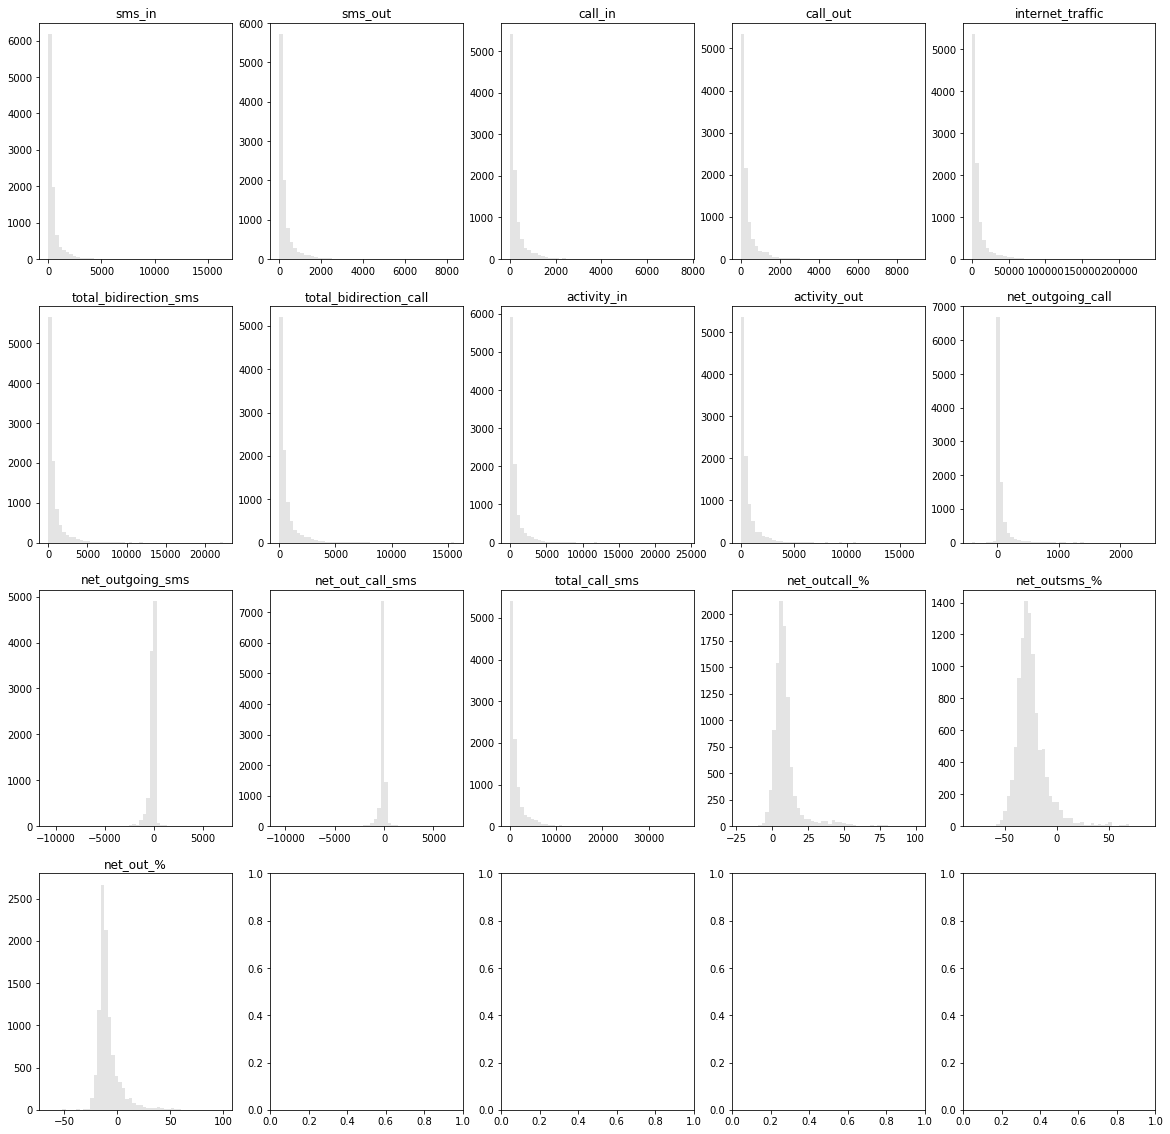

In [35]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

i = 0
j = 0
for c in col:
    ax[i, j].hist(mi_total_act[c], 50, facecolor='lightgrey', alpha=0.6)
    ax[i, j].set_title(c)
    if j == 4:
        i += 1
        j = 0
    else:
        j += 1

plt.show()

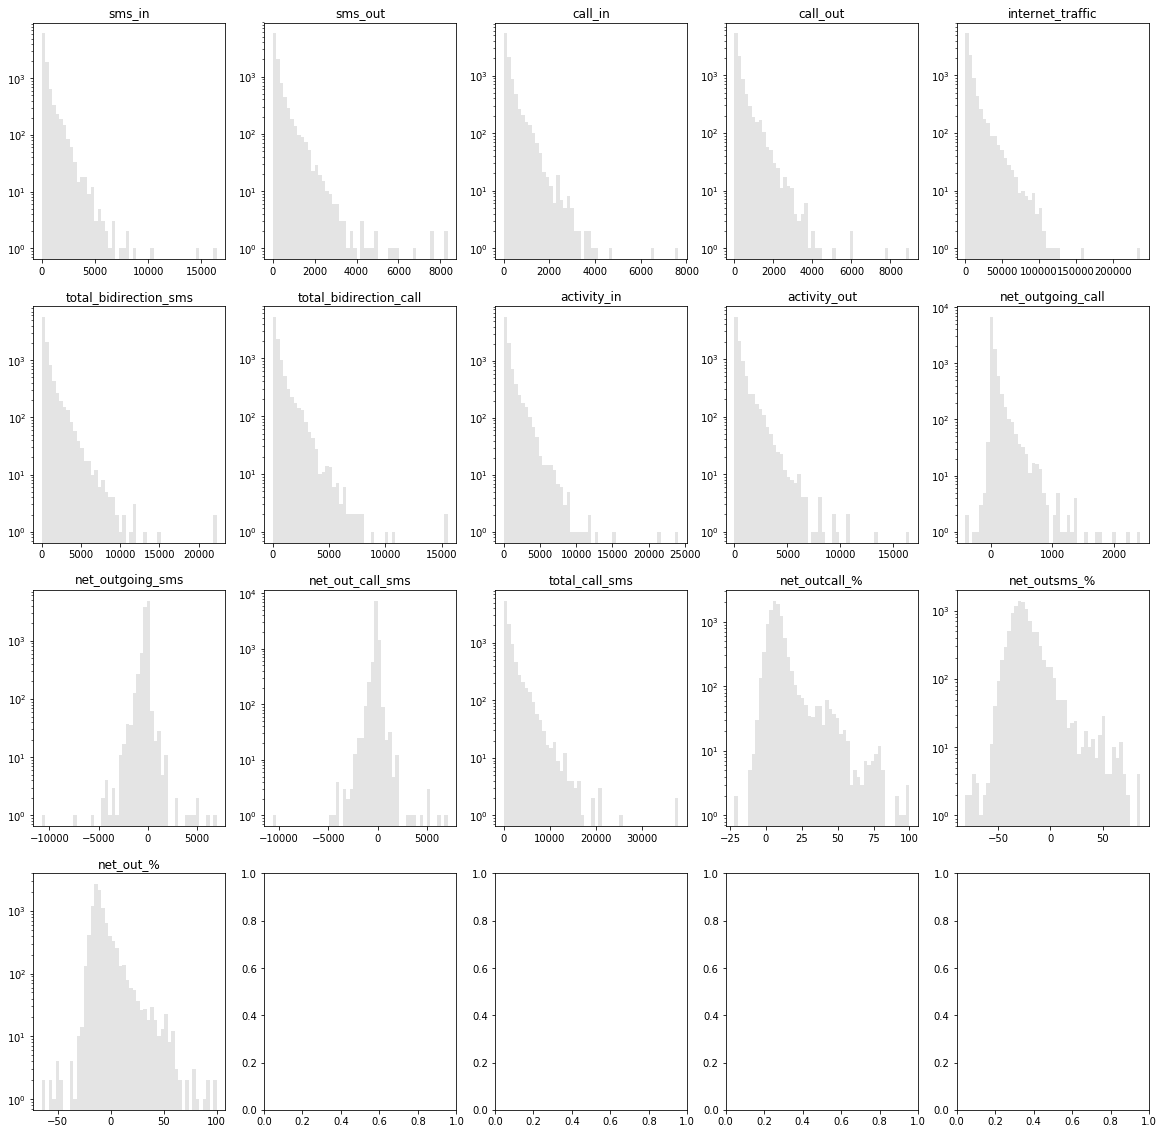

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

i = 0
j = 0
for c in col:
    ax[i, j].hist(mi_total_act[c], 50, facecolor='lightgrey', alpha=0.6)
    ax[i, j].set_title(c)
    ax[i, j].set_yscale('log')
    if j == 4:
        i += 1
        j = 0
    else:
        j += 1

plt.show()

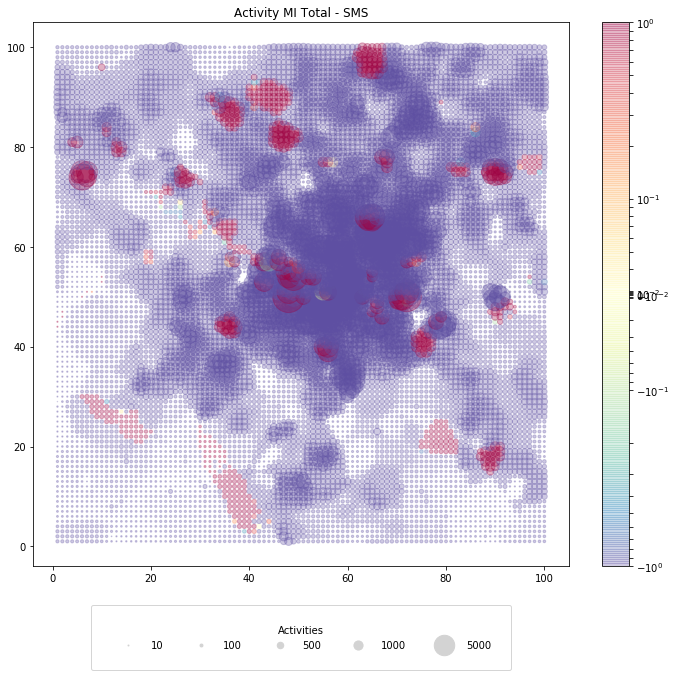

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_square_coor(mi_total_act, 
                 'total_bidirection_sms', 'net_outsms_%', 
                 'Activity MI Total - SMS')
plt.show()

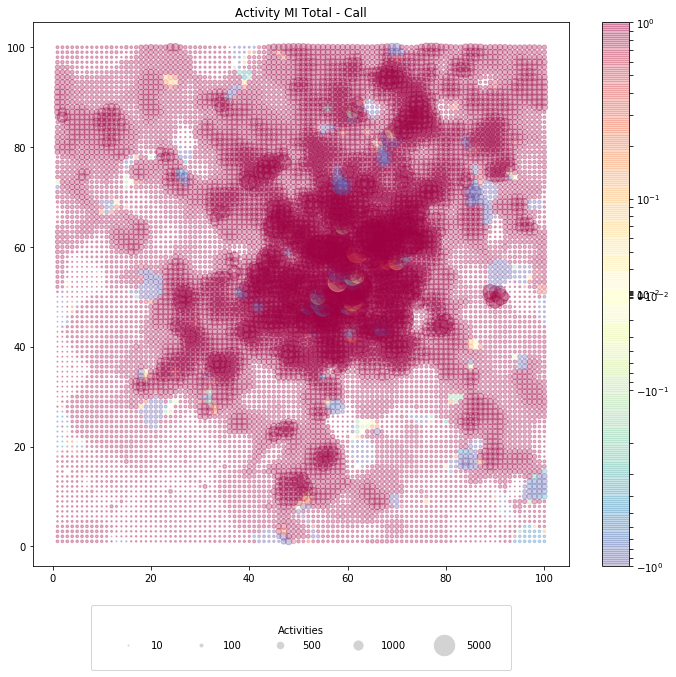

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_square_coor(mi_total_act, 
                 'total_bidirection_call', 'net_outcall_%', 
                 'Activity MI Total - Call')
plt.show()

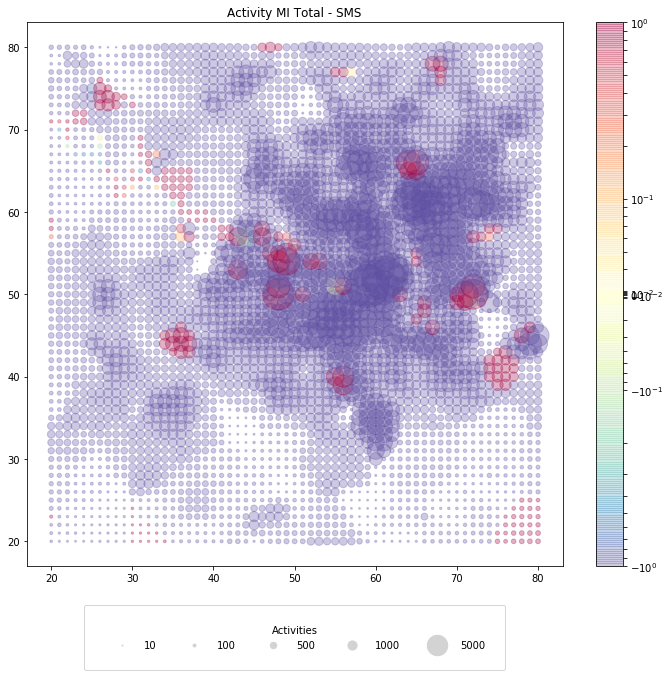

In [39]:
fig, ax = plt.subplots(figsize=(12, 10))
zoom_center = ((mi_total_act['row'] >= 20) 
               & (mi_total_act['row'] <= 80) 
               & (mi_total_act['col'] >= 20) 
               & (mi_total_act['col'] <= 80))

plot_square_coor(mi_total_act.loc[zoom_center], 
                 'total_bidirection_sms', 'net_outsms_%', 
                 'Activity MI Total - SMS')
plt.show()

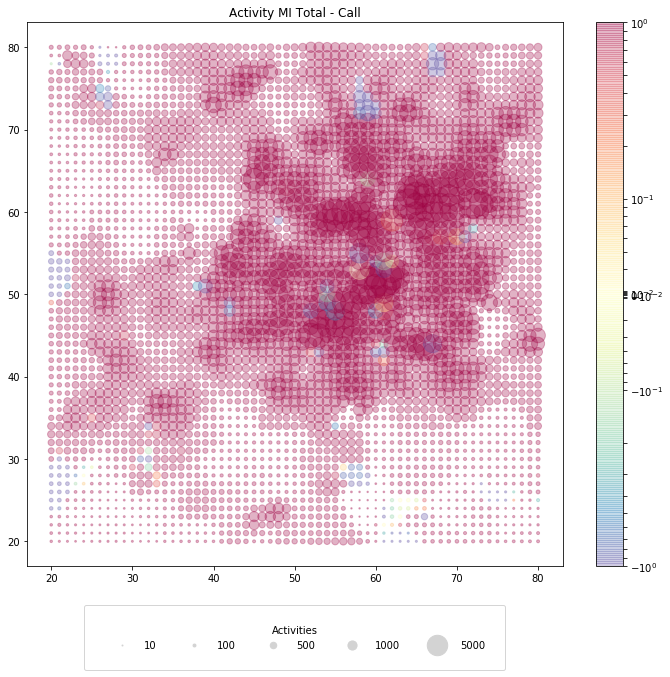

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))
zoom_center = ((mi_total_act['row'] >= 20) 
               & (mi_total_act['row'] <= 80) 
               & (mi_total_act['col'] >= 20) 
               & (mi_total_act['col'] <= 80))

plot_square_coor(mi_total_act.loc[zoom_center], 
                 'total_bidirection_call', 'net_outcall_%', 
                 'Activity MI Total - Call')
plt.show()

In [41]:
np.corrcoef(mi_total_act['total_bidirection_sms'],
            mi_total_act['total_bidirection_call'])

array([[1.        , 0.95169326],
       [0.95169326, 1.        ]])

In [42]:
np.corrcoef(mi_total_act['net_outcall_%'],
            mi_total_act['net_outsms_%'])

array([[ 1.        , -0.04933402],
       [-0.04933402,  1.        ]])

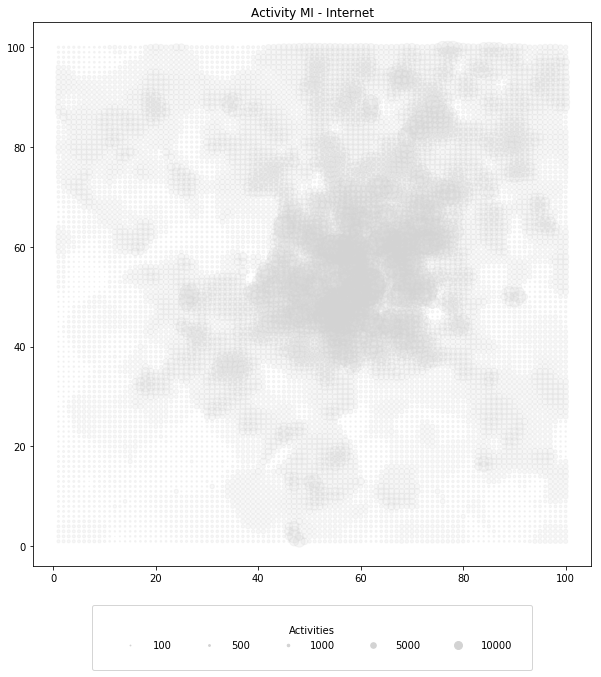

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=mi_total_act['col'], 
            y=mi_total_act['row'], 
            s=mi_total_act['internet_traffic']/160, 
            c='lightgrey', alpha=0.2)
plt.title('Activity MI - Internet')
legend_label = [100, 500, 1000, 5000, 10000]
legend_box = [plt.scatter([], [], s=i/160, c='lightgrey') for i in legend_label]
plt.legend(legend_box, legend_label, bbox_to_anchor=(0.5, -0.2), 
           ncol=5, handlelength=3.5, loc=8, borderpad=2, 
           handletextpad=0.5, title='Activities'
          )
plt.show()

In [44]:
period = ['mnight_hr', 'night_hr', 'work_hr', 'free_hr']
hr_map, mi_by_hr = map_to_square('time_period', period)

mi_by_hr.head()

square_id time_period    time_interval  country_code  sms_in  sms_out  \
0          1     free_hr   77466057600000          2189   11.55     6.86   
1          1   mnight_hr   26282074800000           517    1.58     1.07   
2          1    night_hr   82996984800000          2265    6.43     3.40   
3          1     work_hr  291879147600000         10019   59.15    34.56   
4          2     free_hr   77466057600000          2189   11.76     6.96   

   call_in  call_out  internet_traffic  total_bidirection_sms  \
0     3.11      3.71            236.96                  18.41   
1     0.22      0.33             85.25                   2.65   
2     1.66      2.17            237.47                   9.83   
3    36.12     42.04            947.36                  93.70   
4     3.16      3.79            237.39                  18.71   

   total_bidirection_call  activity_in  activity_out  net_outgoing_call  \
0                    6.82        14.66         10.57               0.60   
1                    0.55         1.80          1.40               0.11   
2                    3.82         8.09          5.57               0.51   
3                   78.16        95.27         76.60               5.92   
4                    6.96        14.92         10.75               0.63   

   net_outgoing_sms  net_out_call_sms  total_call_sms  
0             -4.69             -4.09           25.23  
1             -0.51             -0.40            3.20  
2             -3.03             -2.52           13.65  
3            -24.59            -18.67          171.87  
4             -4.80             -4.17           25.67

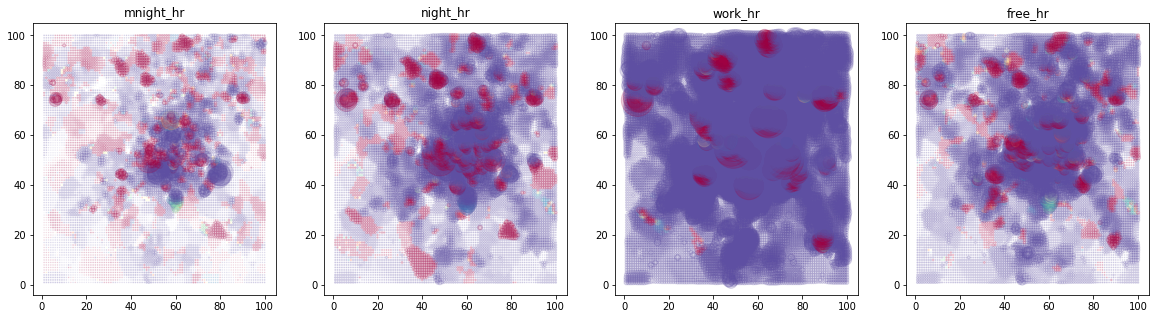

In [45]:
fig, ax = plt.subplots(ncols=len(period), figsize=(20, 5))
plot_map(hr_map, 'total_bidirection_sms', 'net_outsms_%', period)
plt.show()

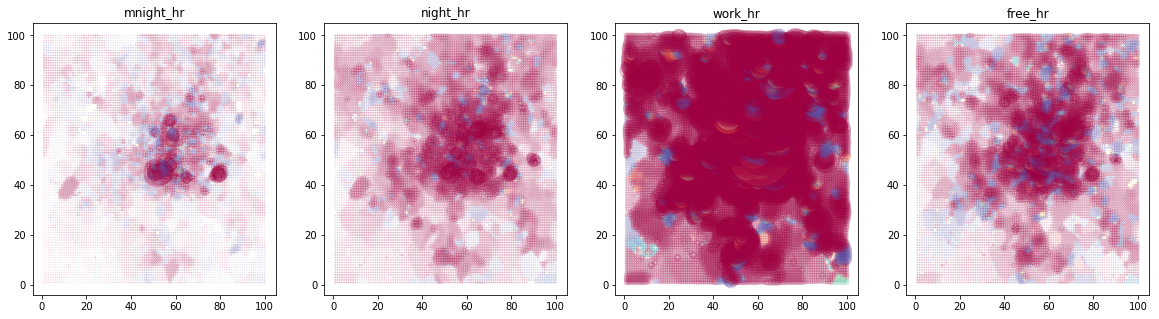

In [46]:
fig, ax = plt.subplots(ncols=len(period), figsize=(20, 5))
plot_map(hr_map, 'total_bidirection_call', 'net_outcall_%', period)
plt.show()

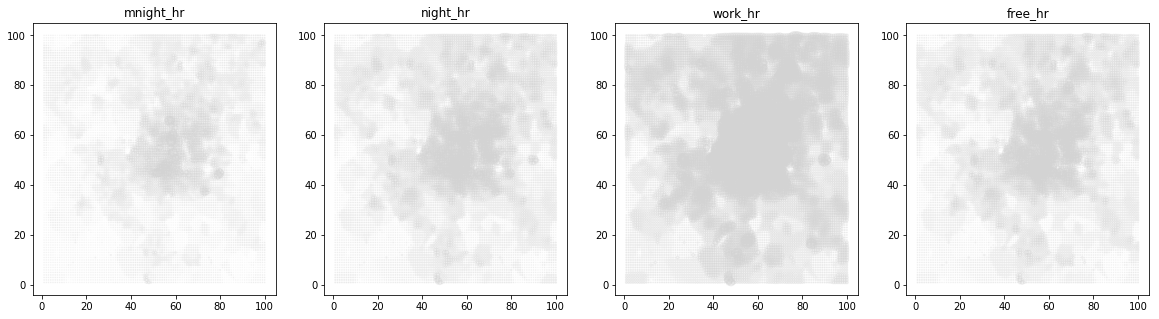

In [47]:
fig, ax = plt.subplots(ncols=len(period), figsize=(20, 5))
plot_map_internet(hr_map, period, 240)
plt.show()

In [48]:
for p in period:
    hr_map[p].fillna(0, inplace = True)
    
for p in period:
    print (p)
    print (np.corrcoef(hr_map[p]['total_bidirection_call'], 
                       hr_map[p]['total_bidirection_sms']))
    print (np.corrcoef(hr_map[p]['net_outcall_%'], 
                       hr_map[p]['net_outsms_%']))

mnight_hr
[[1.         0.83314681]
 [0.83314681 1.        ]]
[[ 1.         -0.06317007]
 [-0.06317007  1.        ]]
night_hr
[[1.         0.74068063]
 [0.74068063 1.        ]]
[[ 1.         -0.01416553]
 [-0.01416553  1.        ]]
work_hr
[[1.         0.96666109]
 [0.96666109 1.        ]]
[[ 1.         -0.08806376]
 [-0.08806376  1.        ]]
free_hr
[[1.         0.92320081]
 [0.92320081 1.        ]]
[[1.         0.00733488]
 [0.00733488 1.        ]]


In [51]:
var_set = ['net_outcall_%', 'net_outsms_%', 
           'total_bidirection_call', 'total_bidirection_sms']
for var in var_set:
    c_sec = pd.DataFrame()
    for p in period:
        c_sec = c_sec.join(hr_map[p][var], how='outer', rsuffix=p)
    display (c_sec.corr())

net_outcall_%  net_outcall_%night_hr  \
net_outcall_%                   1.00                   0.32   
net_outcall_%night_hr           0.32                   1.00   
net_outcall_%work_hr            0.22                   0.52   
net_outcall_%free_hr            0.26                   0.43   

                       net_outcall_%work_hr  net_outcall_%free_hr  
net_outcall_%                          0.22                  0.26  
net_outcall_%night_hr                  0.52                  0.43  
net_outcall_%work_hr                   1.00                  0.62  
net_outcall_%free_hr                   0.62                  1.00

net_outsms_%  net_outsms_%night_hr  net_outsms_%work_hr  \
net_outsms_%                  1.00                  0.54                 0.49   
net_outsms_%night_hr          0.54                  1.00                 0.63   
net_outsms_%work_hr           0.49                  0.63                 1.00   
net_outsms_%free_hr           0.60                  0.54                 0.66   

                      net_outsms_%free_hr  
net_outsms_%                         0.60  
net_outsms_%night_hr                 0.54  
net_outsms_%work_hr                  0.66  
net_outsms_%free_hr                  1.00

total_bidirection_call  \
total_bidirection_call                            1.00   
total_bidirection_callnight_hr                    0.73   
total_bidirection_callwork_hr                     0.30   
total_bidirection_callfree_hr                     0.57   

                                total_bidirection_callnight_hr  \
total_bidirection_call                                    0.73   
total_bidirection_callnight_hr                            1.00   
total_bidirection_callwork_hr                             0.77   
total_bidirection_callfree_hr                             0.84   

                                total_bidirection_callwork_hr  \
total_bidirection_call                                   0.30   
total_bidirection_callnight_hr                           0.77   
total_bidirection_callwork_hr                            1.00   
total_bidirection_callfree_hr                            0.88   

                                total_bidirection_callfree_hr  
total_bidirection_call                                   0.57  
total_bidirection_callnight_hr                           0.84  
total_bidirection_callwork_hr                            0.88  
total_bidirection_callfree_hr                            1.00

total_bidirection_sms  \
total_bidirection_sms                           1.00   
total_bidirection_smsnight_hr                   0.75   
total_bidirection_smswork_hr                    0.42   
total_bidirection_smsfree_hr                    0.63   

                               total_bidirection_smsnight_hr  \
total_bidirection_sms                                   0.75   
total_bidirection_smsnight_hr                           1.00   
total_bidirection_smswork_hr                            0.76   
total_bidirection_smsfree_hr                            0.83   

                               total_bidirection_smswork_hr  \
total_bidirection_sms                                  0.42   
total_bidirection_smsnight_hr                          0.76   
total_bidirection_smswork_hr                           1.00   
total_bidirection_smsfree_hr                           0.87   

                               total_bidirection_smsfree_hr  
total_bidirection_sms                                  0.63  
total_bidirection_smsnight_hr                          0.83  
total_bidirection_smswork_hr                           0.87  
total_bidirection_smsfree_hr                           1.00